In [1]:
import pandas as pd
import yfinance as yf
stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
print(stk_data.head())

C:\Users\tiruk\AppData\Local\Temp\ipykernel_15524\620575181.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stk_data = yf.download("RELIANCE.NS", start="2021-06-01", end="2022-05-01")
[*********************100%***********************]  1 of 1 completed

Price             Close         High         Low         Open      Volume
Ticker      RELIANCE.NS  RELIANCE.NS RELIANCE.NS  RELIANCE.NS RELIANCE.NS
Date                                                                     
2021-06-01   987.374878  1002.443386  977.177403   986.054647    28013832
2021-06-02  1002.101929  1005.857676  981.957442   981.957442    24630162
2021-06-03  1005.925903  1024.294928  999.757398  1011.092856    23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425    14468646
2021-06-07  1014.006531  1020.653085  994.704287  1002.443427    16336573


In [3]:
dataset = pd.read_csv("reliance_data.csv", skiprows=1)

In [4]:
import pandas as pd
# Flatten column MultiIndex if exists
if isinstance(stk_data.columns, pd.MultiIndex):
    stk_data.columns = [col[0] for col in stk_data.columns]

# Check data
print("Data fetched successfully!")
print(stk_data.head())

Data fetched successfully!
                  Close         High         Low         Open    Volume
Date                                                                   
2021-06-01   987.374878  1002.443386  977.177403   986.054647  28013832
2021-06-02  1002.101929  1005.857676  981.957442   981.957442  24630162
2021-06-03  1005.925903  1024.294928  999.757398  1011.092856  23974257
2021-06-04   997.208069  1009.021575  994.362780  1008.270425  14468646
2021-06-07  1014.006531  1020.653085  994.704287  1002.443427  16336573


In [5]:
stk_data

,Close,High,Low,Open,Volume
Date,,,,,
2021-06-01,987.374878,1002.443386,977.177403,986.054647,28013832
2021-06-02,1002.101929,1005.857676,981.957442,981.957442,24630162
2021-06-03,1005.925903,1024.294928,999.757398,1011.092856,23974257
2021-06-04,997.208069,1009.021575,994.362780,1008.270425,14468646
2021-06-07,1014.006531,1020.653085,994.704287,1002.443427,16336573
...,...,...,...,...,...
2022-04-25,1231.155029,1260.117952,1216.833432,1252.808769,17063215
2022-04-26,1267.998291,1276.837970,1236.956766,1238.007426,12227666
2022-04-27,1269.231689,1291.913249,1258.587463,1258.952988,19338945


In [6]:
column="Close"

In [7]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (228, 1)


In [8]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

217
X_train length: (217, 1)
X_test length: (11, 1)
y_train length: (217, 1)
y_test length: (11, 1)


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=n
RMSE-Testset: 0.7603338063462776
maPe-Testset: 0.7628227940628908
************


C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=t
RMSE-Testset: 0.17645762938611045
maPe-Testset: 0.16967429263411593
************


C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.43042172742115736
maPe-Testset: 0.429858184207978
************
Trend=ct
RMSE-Testset: 0.23503416438527872
maPe-Testset: 0.2265820914008134
************


C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
len(y_pred)

11

In [12]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Anaconda3\envs\dineshML\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.4189655933213481
maPe-Testset: 0.4142711515675945
************


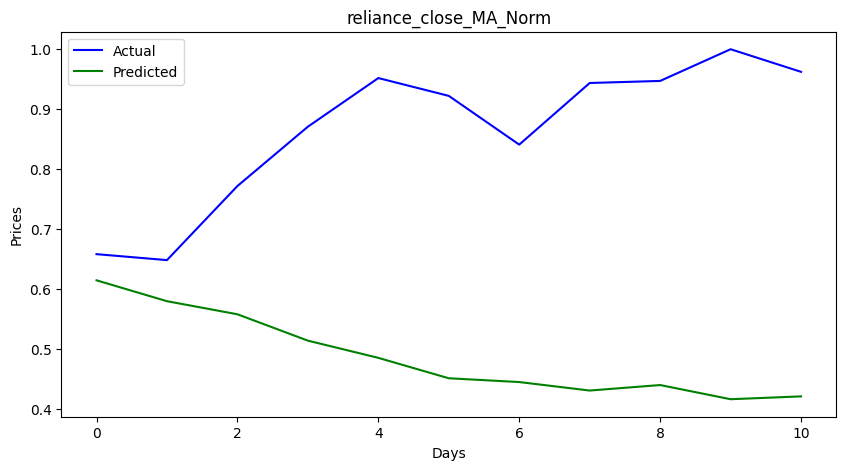

In [13]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","Reliance_close_MA_Norm","Days","Prices")

In [14]:
len(data1)

228

In [15]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [16]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

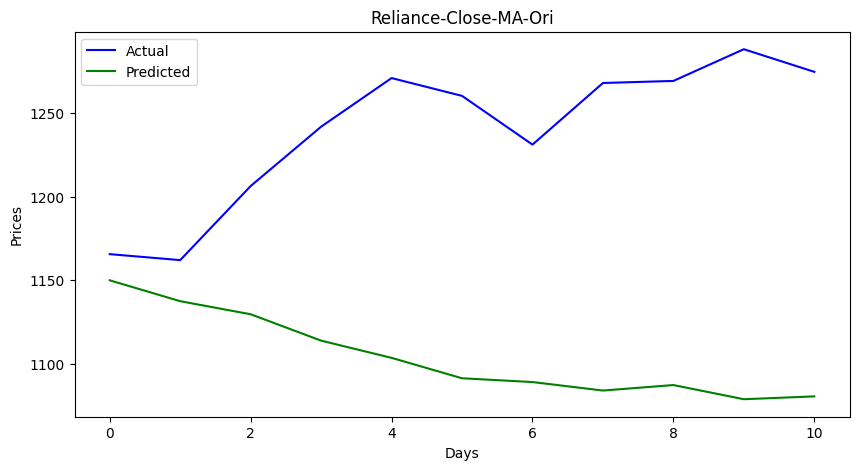

In [17]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-Close-MA-Ori","Days","Prices")

In [18]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 150.15955475013357
maPe-Testset: 0.10771910017665251


In [19]:
forecast=model_fit.predict(len(data1), len(data1))

In [20]:
forecast

array([0.40524574])

In [21]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [22]:
forecast_stock_price_test_oriF

,Closefore
0,1075.027012


In [23]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)